# Strassen's algorithm

In [28]:
import random
import numpy as np
from tqdm import tqdm
from timeit import default_timer as timer
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [4]:
def matrix_addition(A, B):
    n = len(A)
    C = [[0 for j in range(n)] for i in range(n)]
    for j in range(n):
        for i in range (n):
            C[i][j] = A[i][j] + B[i][j]
    return C

def matrix_subtraction(A, B):
    n = len(A)
    C = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = A[i][j] - B[i][j]
    return C

def strassens(A, B):
    # Implementation of the strassen algorithm
    n = len(A)
    C = [[0 for j in range(n)] for i in range(n)]
    if n == 1:
      C[0][0] = A[0][0]*B[0][0]
    else:
        # the new sub-matrices by dividing n (n/2)
        m = n // 2
        A11 = [[0 for j in range(m)] for i in range(m)]
        A12 = [[0 for j in range(m)] for i in range(m)]
        A21 = [[0 for j in range(m)] for i in range(m)]
        A22 = [[0 for j in range(m)] for i in range(m)]

        B11 = [[0 for j in range(m)] for i in range(m)]
        B12 = [[0 for j in range(m)] for i in range(m)]
        B21 = [[0 for j in range(m)] for i in range(m)]
        B22 = [[0 for j in range(m)] for i in range(m)]


        # create 4 sub-matrices(top left, top right bottom letf and right:
        for i in range(m):
            for j in range(m):
                A11[i][j] = A[i][j]            
                A12[i][j] = A[i][j + m]
                A21[i][j] = A[i + m][j]    
                A22[i][j] = A[i + m][j + m] 

                B11[i][j] = B[i][j]            
                B12[i][j] = B[i][j + m]    
                B21[i][j] = B[i + m][j]    
                B22[i][j] = B[i + m][j + m] 
        # making the calculation for all the ps
        S1 = matrix_subtraction(B12,B22)
        S2 = matrix_addition(A11,A12)
        S3 = matrix_addition(A21,A22)
        S4 = matrix_subtraction(B21,B11)
        S5 = matrix_addition(A11,A22)
        S6 = matrix_addition(B11,B22)
        S7 = matrix_subtraction(A12,A22)
        S8 = matrix_addition(B21,B22)
        S9 = matrix_subtraction(A11,A22)
        S10 = matrix_addition(B11,B12)

        P1 = strassens(A11, S1) # p1 = (a11) * (b12-b22)
        P2 = strassens(S2, B22)
        P3 = strassens(S3,B11)
        P4 = strassens(A22,S4)
        P5 = strassens(S5,S6)
        P6 = strassens(S7,S8)
        P7 = strassens(S9,S10)
    # reqrouping all the ps into c11, c22,c21,c12
        C11 = matrix_addition(matrix_subtraction(matrix_addition(P5,P4),P2),P6) # P5 + P4 - P2 + P6
        C12 = matrix_addition(P1, P2)
        C21 = matrix_addition(P3, P4)
        C22 = matrix_subtraction(matrix_addition(P5,P1),matrix_addition(P3,P7)) # P5 + P1 - P3 - P7 
    # Grouping the results obtained in a single matrix:
        C = [[0 for j in range(n)] for i in range(n)]
        for i in range(m):
            for j in range(m):
                C[i][j] = C11[i][j]
                C[i][j + m] = C12[i][j]
                C[i + m][j] = C21[i][j]
                C[i + m][j + m] = C22[i][j]
    return C

In [ ]:
size = 4
A = np.random.randint(1, 100, (size, size), dtype="i")
B = np.random.randint(1, 100, (size, size), dtype="i")
print("Matrix A\n",A)
print("Matrix B\n", B)

Matrix A
 [[78 37 61 52]
 [77  5 81 27]
 [55 97 39 79]
 [76 76 67 92]]
Matrix B
 [[84 18 37 30]
 [74 19 71 31]
 [72 12 69 86]
 [60 47 88 65]]


In [ ]:
print(strassens(A, B))

[[16802, 5283, 14298, 12113], [14290, -8158, 11169, -2008], [19346, 7014, 14019, 11478], [22352, 10040, 22158, 24846]]


In [ ]:
size = 8
A = np.random.randint(1, 100, (size, size), dtype="i")
B = np.random.randint(1, 100, (size, size), dtype="i")
print("Matrix A\n",A)
print("Matrix B\n", B)
print(strassens(A, B))

Matrix A
 [[26 45 98 62 76 34 30 66]
 [54 99 10 54 34 34 81 92]
 [45 85 88 76 46 48 27 20]
 [63 51 50 39 99 71 90 82]
 [67 80 51 66 58 90 64 62]
 [91 70 25 99 25 11 89 52]
 [ 4 85 67 94 14 41 26 65]
 [90 74 64 21 90 78 61 12]]
Matrix B
 [[ 1 50 21 49 51 68 68 53]
 [91 87 62 28 50 75 32 99]
 [56 65 82 15 42 45 23 50]
 [45 86 53 74 40 42 81  5]
 [52 97 60 65  7 26 19 99]
 [ 1 55 80 80 94 90 36 50]
 [98 39 80 62 16 11 61 87]
 [23  3 62 67 87 48 84 33]]
[[20843, 27527, 28430, 22534, 20122, 20691, 20526, 25055], [23909, 34336, 27898, 34660, 23018, 32546, 25983, 38867], [21674, 30116, 22632, 17737, 20287, 23360, 20134, 22885], [25184, 24244, 32317, 27758, 25364, 22362, 25705, 28241], [23977, 32559, 33691, 30264, 29359, 30387, 28057, 33088], [23545, 28164, 26272, 24331, 10834, -13906, 16692, -9596], [20533, 24856, 32111, 33150, 8884, 6900, 17499, 17930], [22365, 17819, 12828, -23759, 21305, 17273, -489, -25810]]


In [ ]:
matrix_mult(A,B)

array([[20843, 27527, 28430, 22534, 20122, 20691, 20526, 25055],
       [23909, 25210, 27898, 25680, 23018, 23066, 25983, 28582],
       [21674, 30116, 27459, 21373, 20287, 23360, 19889, 25543],
       [25184, 31455, 34556, 31340, 25364, 25887, 27040, 34970],
       [23977, 32559, 33691, 30264, 27483, 28911, 27089, 32207],
       [23545, 27436, 26272, 25627, 20308, 21836, 27690, 25982],
       [20533, 24856, 26060, 20694, 21051, 21070, 20935, 20290],
       [22365, 32339, 30103, 25672, 21800, 26039, 20908, 33914]],
      dtype=int32)

In [ ]:
def matrix_mult(A,B):
    n = len(A)
    res = np.zeros((n, n), dtype="i")
    for i in range(n):
        for j in range(n):
            temp_res = 0
            for l in range(n):
                temp_res += A[i][l] * B[l][j]
            res[i][j] = temp_res
    return res
print(matrix_mult(A,B))

[[16802  5283 14298 12113]
 [14290  3722 11169 11186]
 [19346  7014 18565 13146]
 [22352  7940 20927 16378]]


In [16]:
def strassens_experiment(v):
    size = int(v)
    A = np.random.randint(1, 100, (size, size), dtype="i")
    B = np.random.randint(1, 100, (size, size), dtype="i")
    strassens(A, B)

In [ ]:
def execution_time(n_runs, n_experiments, func):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
            start_time = timer()
            func(j)
            times[i].append(timer() - start_time)        
    return np.array(times, dtype=np.float64).mean(axis=0)

In [19]:
def execution_time(n_runs, n_experiments, func):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
            start_time = timer()
            func(j)
            times[i].append(timer() - start_time)        
    return np.array(times, dtype=np.float64).mean(axis=0)

In [24]:
def plotting(avg_time, theor_complexity, title):
    
    xdata = np.arange(len(avg_time), dtype=np.float64)
    ydata = np.array(avg_time, dtype=np.float64)
    popt, _ = curve_fit(theor_complexity, xdata, ydata)
    plt.figure(figsize=(15,7)) #determed size of graph
    plt.plot(avg_time)
    plt.title(f"Dependence of execution time on the size of the input data for {title}")
    plt.plot(xdata, theor_complexity(xdata, *popt), 'r-',
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Empirical ", "Theoretical"])
    plt.xlabel('Size of input data, n')
    plt.ylabel('Execution time, sec')
    plt.show()

In [44]:
def plotting(avg_time, theor_complexity, title):
    if theor_complexity == nlog_complexity:
        xdata = np.linspace(1, len(avg_time), len(avg_time)-1, dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(theor_complexity, xdata, ydata[1:])
    else:
        xdata = np.arange(len(avg_time), dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(theor_complexity, xdata, ydata)
    plt.figure(figsize=(15,7)) #determed size of graph
    plt.plot(avg_time)
    plt.title(f"Dependence of execution time on the size of the input data for {title}")
    plt.plot(xdata, theor_complexity(xdata, *popt), 'r-',
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Empirical ", "Theoretical"])
    plt.xlabel('Size of input data, n')
    plt.ylabel('Execution time, sec')
    plt.show()

In [50]:
def strassens_complexity(x, a):
    return a * x ** 2.81

In [53]:
avg_time_strassens = execution_time(5, 200, strassens_experiment)

100%|██████████| 200/200 [14:29<00:00,  4.35s/it]


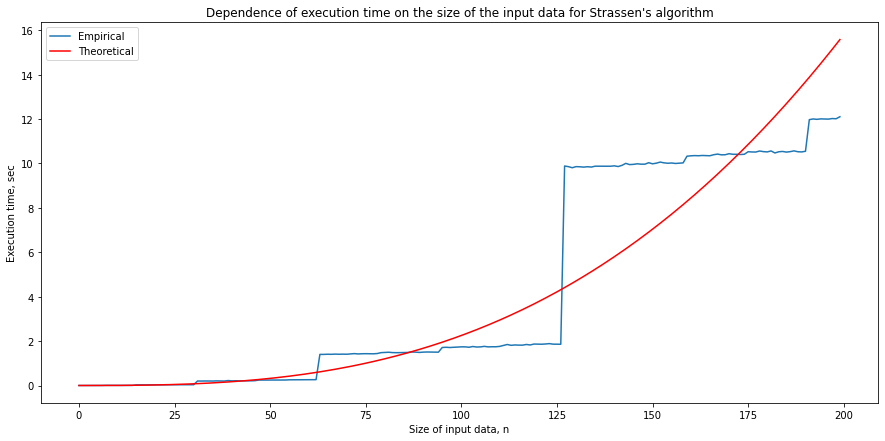

In [54]:
plotting(avg_time_strassens, strassens_complexity, "Strassen's algorithm")

# Greedy Algorithms for activity selection problem

In [ ]:
def MaxActivities(arr,n):
    arr.sort(key = lambda x : x[1])
    selected = []
    # The first activity always gets selected
    i = 0
    selected.append(arr[i])
    for j in range(1, n):
      '''If this activity has start time greater than or
         equal to the finish time of previously selected
         activity, then select it'''
      if arr[j][0] >= arr[i][1]:
          selected.append(arr[j])
          i = j
    return selected
 
# Driver code
Activity = [[5, 9], [1, 2], [3, 4], [0, 6],[5, 7], [8, 9]]
print("Initial data:\n", Activity)
 Sort jobs according to finish time
Activity.sort(key = lambda x : x[1])
print("Sorted data by finish time:\n",Activity)
n = len(Activity)
selected = MaxActivities(Activity, n)
print("Following activities are selected:")
print(selected)

Initial data:
 [[5, 9], [1, 2], [3, 4], [0, 6], [5, 7], [8, 9]]
Sorted data by finish time:
 [[1, 2], [3, 4], [0, 6], [5, 7], [5, 9], [8, 9]]
Following activities are selected:
[[1, 2], [3, 4], [5, 7], [8, 9]]


In [36]:
def MaxActivities(arr):
    arr.sort(key = lambda x : x[1])
    n=len(arr)
    selected = []
    # The first activity always gets selected
    i = 0
    selected.append(arr[i])
    for j in range(1, n):
      '''If this activity has start time greater than or
         equal to the finish time of previously selected
         activity, then select it'''
      if arr[j][0] >= arr[i][1]:
          selected.append(arr[j])
          i = j
    return selected

In [37]:
def greedy_algorithm(v):
    randomlist = []
    for i in range(v):
        n = random.randint(1,30)
        m = random.randint(1,30)
        randomlist.append([n,m])
    activity_list = MaxActivities(randomlist)
    return activity_list

In [42]:
def nlog_complexity(x, a):
    return a*x*np.log(x)

In [48]:
avg_time_greedy_alg = execution_time(5, 2000, greedy_algorithm)

100%|██████████| 2000/2000 [00:06<00:00, 287.38it/s]


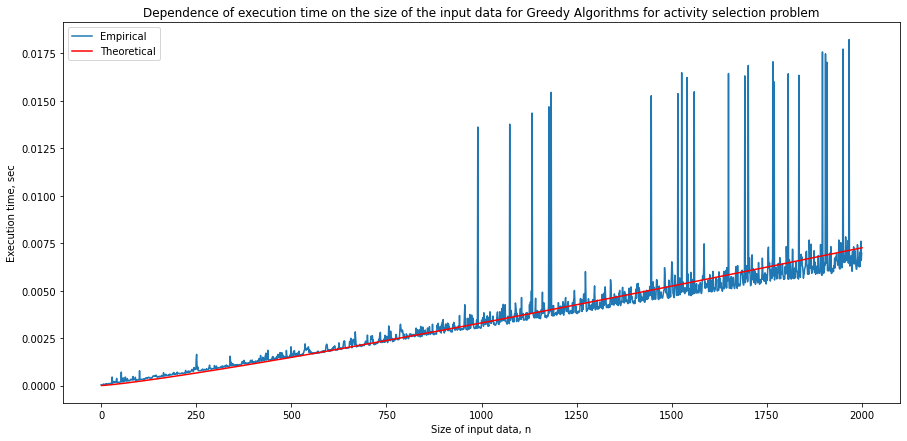

In [49]:
plotting(avg_time_greedy_alg, nlog_complexity, "Greedy Algorithms for activity selection problem")